# Poincaré Map Project

## Olivia Hogan

### Abstract

Poincaré maps are used when analyzing a system that seems to have periodic behavior. A poincaré map depicts the intersection of a closed periodic function. When the orbit returns to the origin, a map is produced. This map is also known as a first occurence map or first return map. In order to produce this map, we need to plot points in synch with the driving force. These points would include maximums and minimums after the intial pass. These maps are helpful when graphing chaotic motion because it shows that even chaos follows certain rules. 

Modeling a swinging pendulum should be a simple poincaré map because it is a simple harmonic motion being modeled. We find that the map is an imperfect circle for around three circular motions. 

### Theoretical Model

Poincaré maps create recognizable patterns by highlighting periodic intervals. For the most part, the structures it produces are relatively simple and they don't fill up the entire graph. To show this structure we are going to plot the phase space trajectories with $\theta$ and $\omega$ together. 

For this program, we animate a swinging pendulum using the RK4 ODE which include:

$$\frac{dx}{dt} = v_x \qquad \frac{dy}{dt} = v_y \qquad \frac{dz}{dt} = v_z$$

$$\frac{d v_x}{dt} = \frac{F_{net,x}}{m} \qquad \frac{d v_y}{dt} = \frac{F_{net,y}}{m} \qquad \frac{d v_y}{dt} = \frac{F_{net,y}}{m}$$

We then model the swinging pendulum using these ODE's:

$$\frac{d\theta}{dt}=\omega$$

$$\frac{d\omega}{dt} = \omega_0^2\gamma \cos(\omega_d t)-\omega_0^2\sin\theta-2\beta\omega$$

Theoretically, the model should look somewhat of a circle going around a few times. The circle won't be completely round, it will be imperfect because the data fluctuates widely.

### Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
    
def RK4(diffeq, y0, t, h):
    """ RK4 method for ODEs:
        Given y0 at t, returns y1 at t+h """
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0
    

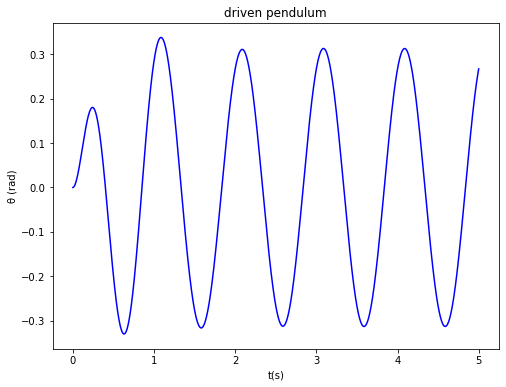

In [2]:
def deriv(d,t):
    θ = d[0]
    ω = d[1]
    
    dθdt = ω
    dωdt = ω_0**2*g*np.cos(ω_d*t) - ω_0**2*np.sin(θ) - 2*b*ω
    
    return np.array([dθdt,dωdt])

ω_d = 2*np.pi
ω_0 = 1.5*ω_d
b = ω_0/4
g = 0.2


#dependent variables
θ = 0
ω = 0

data = np.array([θ,ω])

#independent variables
t = 0
dt = 0.001

N = int(5/dt)

tdata = []
θdata = []
ωdata = []


for i in range (N):
    data = RK4(deriv, data, t, dt)

    t = t + dt
    
    tdata.append(t)
    θdata.append(data[0])
    ωdata.append(data[1])
    
plt.figure(figsize=(8,6))
plt.title("driven pendulum")    
plt.plot(tdata,θdata,'b-')
plt.xlabel("t(s)")
plt.ylabel("θ (rad)")
plt.show()


In [3]:
from vpython import *

<IPython.core.display.Javascript object>

In [4]:
g = 9.8
r = g/ω_0**2

scene = canvas()

pivot = sphere(pos=vec(0,0,0), color=color.white, radius = r/100)
ball = sphere(pos=vec(0,-r,0), color=color.yellow, radius = r/20)
rod = cylinder(pos=pivot.pos, axis=ball.pos-pivot.pos, radius=r/100, color=color.white)

scene.pause()

for i in range(int(N/5)):
    rate(1000)
    
    θ=θdata[i]
    x = r*np.sin(θ)
    y = -r*np.cos(θ)
    
    ball.pos = vec(x, y, 0)
    rod.axis = ball.pos - pivot.pos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

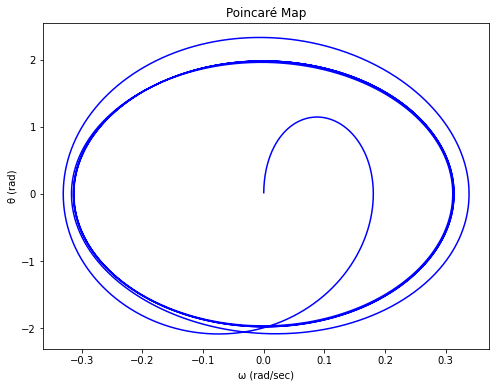

In [5]:
plt.figure(figsize=(8,6))
plt.title("Poincaré Map")    
plt.plot(θdata, ωdata, 'b-')
plt.xlabel("ω (rad/sec)")
plt.ylabel("θ (rad)")
plt.show()


### Validation

Poincaré maps can vary in shapes and sizes depending on the parameters provided. With the map above both our $\omega$ and $\theta$ began at zero. If we changed them both to begin at $2$ then the Poincaré map would look like this: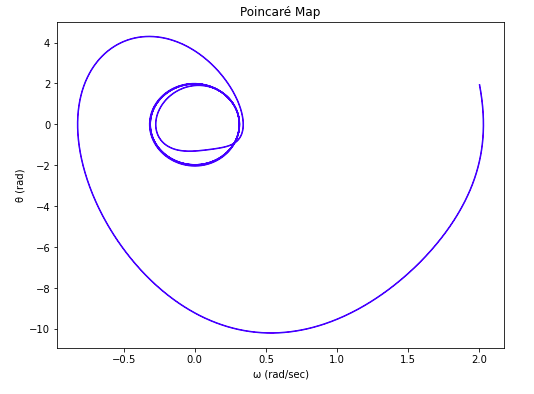

The associated graph of the pendulum would look like this: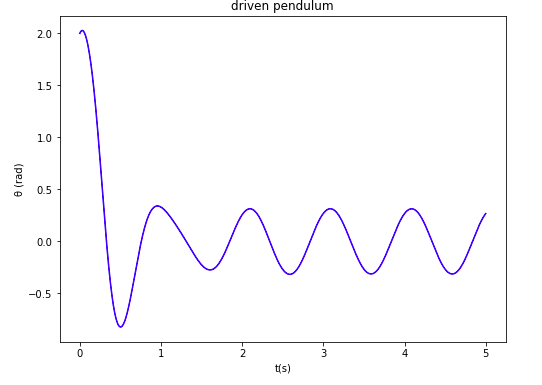

If we increase $\theta$ and keep $\omega$ at $2$ we get this Poincaré: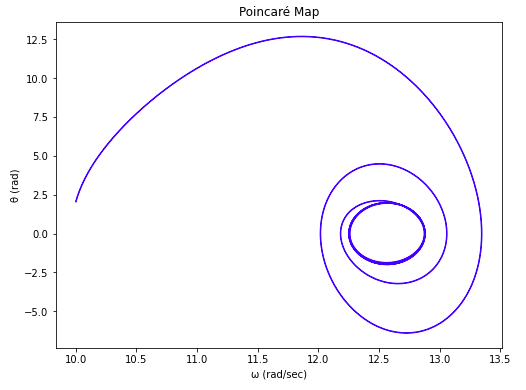

With its associated pendulum graph as: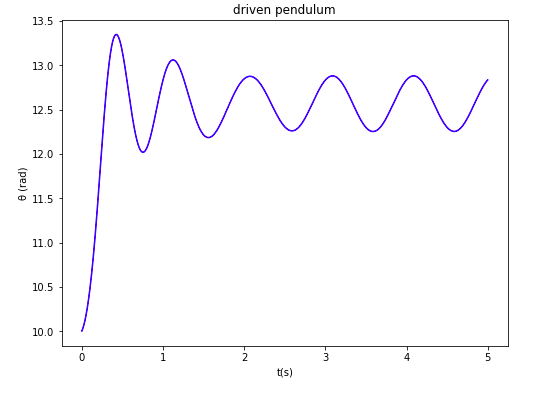

If we increase $\theta$ to $100$ and bump up $\omega$ to $12$ and we increase the time step to $10$ we see the Poincaré as: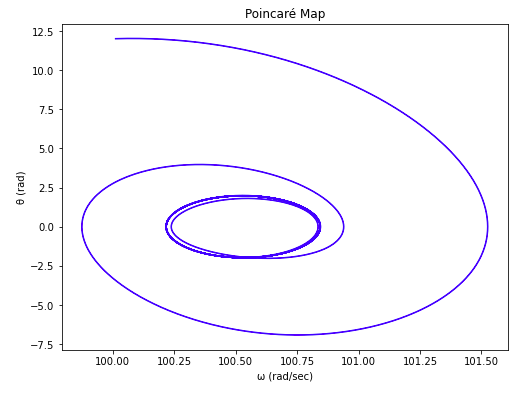

With the associated pendulum graph looking like: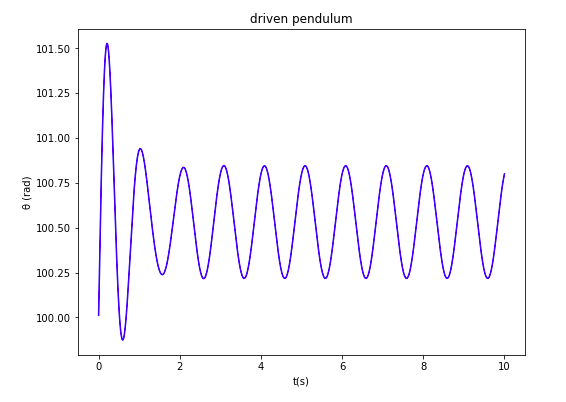

Through the multiple test runs, we can associate our original Poincaré map with the correct solution. The outcome is predicted because the original pendulum just swings slowly back and forth for three intersections which shows in our map.

### Conclusion

From the above reseach and results we can conclude that the Poincaré map clearly depicts clearly the intersections from a closed periodic system. The periodic orbit is modeled with a set of inital conditions in a defined space and then visually represented a map by plotting $\omega$ and $\theta$ on the same plot. 

### References 

https://www.sciencedirect.com/topics/engineering/poincare-map
https://www.math.wisc.edu/~angenent/519.2016s/notes/poincare-map.html
Computational Modeling and Vizualization of Physical Systems by Jay Wang p.159-161
03-03-damped-driven-pendulum: http://localhost:8888/notebooks/Documents/PHY2200/03-03-damped-driven-pendulum-oliviahogan/03-03-damped-driven-pendulum.ipynb